In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

#from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
#np.random.seed(5)

#iris = datasets.load_iris()
#X = iris.data

In [3]:
#X.shape

In [4]:
#a=X[:,0:1]
#b=X[:,1:2]
#c=X[:,2:3]

In [5]:
df = pd.DataFrame({
    'x':[12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 85, 83, 95],
    'y':[39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 88, 83, 94],
    'z':[11, 12, 23, 21, 33, 42, 59, 64, 72, 68, 70, 82, 16, 15, 13] })

In [6]:
df

,x,y,z
0,12,39,11
1,20,36,12
2,28,30,23
3,18,52,21
4,29,54,33
5,33,46,42
6,24,55,59
7,45,59,64
8,45,63,72
9,52,70,68


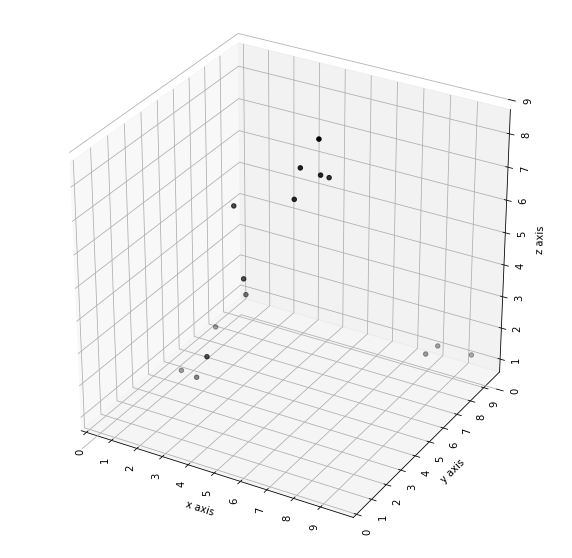

In [7]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(df['x'], df['y'], df['z'], c='k') #marker='o'

ax.set_xticklabels(np.arange(100), rotation=90, fontsize=10 )
ax.set_xlabel('x axis')
ax.set_xticks(np.arange(0, 100, 10.0))

ax.set_yticklabels(np.arange(100), rotation=90, fontsize=10 )
ax.set_ylabel('y axis')
ax.set_yticks(np.arange(0, 100, 10.0))

ax.set_zticklabels(np.arange(100), rotation=90, fontsize=10 )
ax.set_zlabel('z axis')
ax.set_zticks(np.arange(0, 100, 10.0))

ax.axis(xmin=0, xmax=100)
ax.axis(ymin=0, ymax=100)
ax.axis(zmin=0, zmax=100)

plt.show()

In [8]:
np.random.seed(100)
k=3

centroids = {
    i+1:[np.random.randint(0,100), np.random.randint(0,100), np.random.randint(0,100)]
    for i in range(k)
}

In [9]:
centroids

{1: [8, 24, 67], 2: [87, 79, 48], 3: [10, 94, 52]}

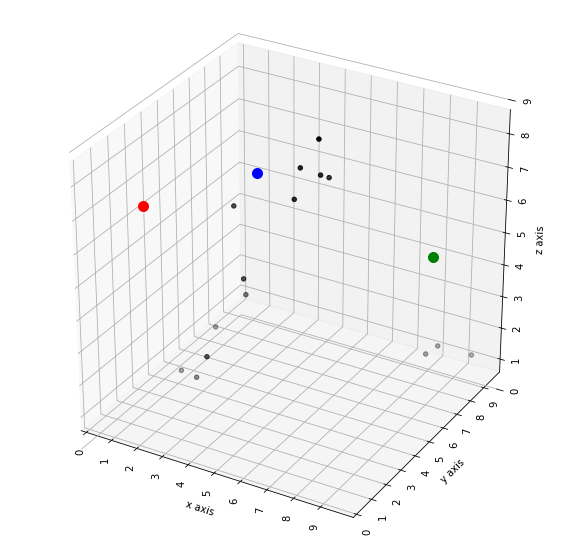

In [10]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(df['x'], df['y'], df['z'], c='k') #marker='o'

ax.set_xticklabels(np.arange(100), rotation=90, fontsize=10 )
ax.set_xlabel('x axis')
ax.set_xticks(np.arange(0, 100, 10.0))

ax.set_yticklabels(np.arange(100), rotation=90, fontsize=10 )
ax.set_ylabel('y axis')
ax.set_yticks(np.arange(0, 100, 10.0))

ax.set_zticklabels(np.arange(100), rotation=90, fontsize=10 )
ax.set_zlabel('z axis')
ax.set_zticks(np.arange(0, 100, 10.0))


colmap = {1:'r', 2:'g', 3:'b'}
for i in centroids.keys():
    ax.scatter(*centroids[i], color=colmap[i], s=100)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlim(0, 100)

plt.show()

In [11]:
centroids

{1: [8, 24, 67], 2: [87, 79, 48], 3: [10, 94, 52]}

In [12]:
def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(
            np.sqrt(
                (df['x']-centroids[i][0])**2 + (df['y']-centroids[i][1])**2 + (df['z']-centroids[i][2])**2 
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head(15))

     x   y   z  distance_from_1  distance_from_2  distance_from_3  closest  \
0   12  39  11        58.111961        92.703829        68.629440        1   
1   20  36  12        57.558666        87.372765        71.161787        1   
2   28  30  23        48.703183        80.665978        72.532751        1   
3   18  52  21        54.772256        78.860637        52.810984        3   
4   29  54  33        49.969991        64.915329        48.187135        3   
5   33  46  42        41.641326        63.568860        54.157179        1   
6   24  55  59        35.791060        68.308125        42.023803        1   
7   45  59  64        51.019604        49.193496        50.931326        2   
8   45  63  72        53.990740        50.950957        50.852729        3   
9   52  70  68        63.663176        41.303753        50.950957        2   
10  51  66  70        60.183054        44.147480        52.810984        2   
11  52  63  82        60.679486        51.351728        60.20797

In [13]:
centroids

{1: [8, 24, 67], 2: [87, 79, 48], 3: [10, 94, 52]}

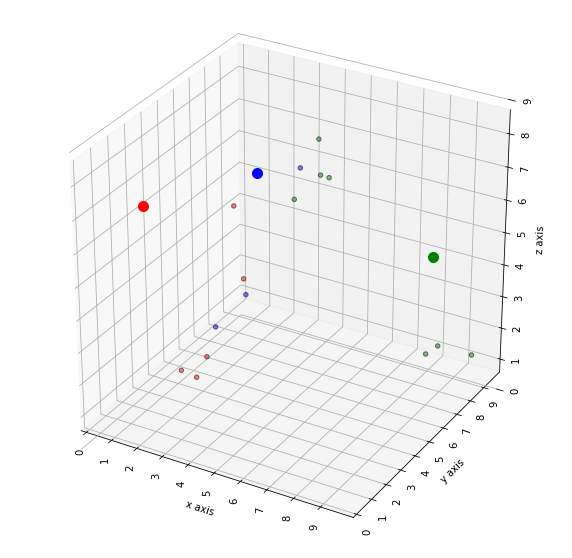

In [14]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

#ax.scatter(df['x'], df['y'], df['z'], c='k') #marker='o'
ax.scatter(df['x'], df['y'], df['z'], color=df['color'], alpha=0.5, edgecolor='k')


ax.set_xticklabels(np.arange(100), rotation=90, fontsize=10 )
ax.set_xlabel('x axis')
ax.set_xticks(np.arange(0, 100, 10.0))

ax.set_yticklabels(np.arange(100), rotation=90, fontsize=10 )
ax.set_ylabel('y axis')
ax.set_yticks(np.arange(0, 100, 10.0))

ax.set_zticklabels(np.arange(100), rotation=90, fontsize=10 )
ax.set_zlabel('z axis')
ax.set_zticks(np.arange(0, 100, 10.0))


#plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    ax.scatter(*centroids[i], color=colmap[i], s=100)
ax.axis(xmin=0, xmax=100)
ax.axis(ymin=0, ymax=100)
ax.axis(zmin=0, zmax=100)

plt.show()

In [15]:
centroids

{1: [8, 24, 67], 2: [87, 79, 48], 3: [10, 94, 52]}

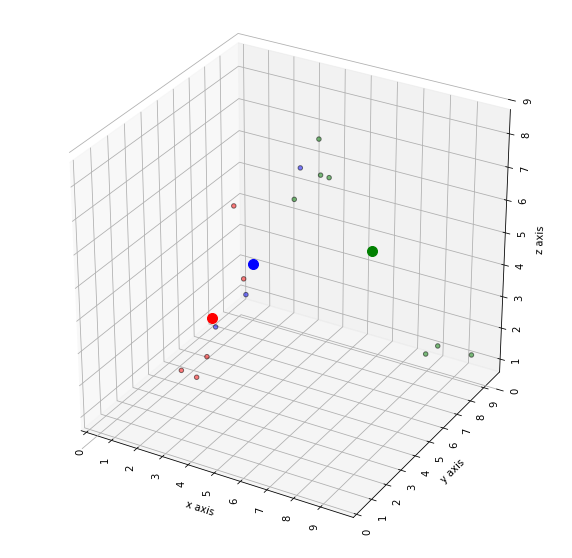

In [16]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest']==i]['x'])
        centroids[i][1] = np.mean(df[df['closest']==i]['y'])
        centroids[i][2] = np.mean(df[df['closest']==i]['z'])
    return k

centroids = update(centroids)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')


ax.scatter(df['x'], df['y'], df['z'], color=df['color'], alpha=0.5, edgecolor='k')

ax.set_xticklabels(np.arange(100), rotation=90, fontsize=10 )
ax.set_xlabel('x axis')
ax.set_xticks(np.arange(0, 100, 10.0))

ax.set_yticklabels(np.arange(100), rotation=90, fontsize=10 )
ax.set_ylabel('y axis')
ax.set_yticks(np.arange(0, 100, 10.0))

ax.set_zticklabels(np.arange(100), rotation=90, fontsize=10 )
ax.set_zlabel('z axis')
ax.set_zticks(np.arange(0, 100, 10.0))

for i in centroids.keys():
    ax.scatter(*centroids[i], color=colmap[i], s=100)
    
ax.axis(xmin=0, xmax=100)
ax.axis(ymin=0, ymax=100)
ax.axis(zmin=0, zmax=100)


#for i in old_centroids.keys():
#    old_x = old_centroids[i][0]
#    old_y = old_centroids[i][1]
 #   old_z = old_centroids[i][2]
  #  dx = (centroids[i][0] - old_centroids[i][0])*0.75
   # dy = (centroids[i][1] - old_centroids[i][0])*0.75
    #dz = (centroids[i][2] - old_centroids[i][0])*0.75
    #ax.arrow(old_x, old_y, dx, dy, head_width = 2, head_length = 3, fc=colmap[i], ec=colmap[i])
plt.show()

In [17]:
df = assignment(df, centroids)
print(df.head())



    x   y   z  distance_from_1  distance_from_2  distance_from_3  closest  \
0  12  39  11        21.756838        74.112711        40.123421        1   
1  20  36  12        18.475930        69.591520        37.778595        1   
2  28  30  23        13.695255        63.430341        32.581522        1   
3  18  52  21        14.709181        59.179940        24.904261        1   
4  29  54  33        14.427751        44.729117         9.445752        3   

  color  
0     r  
1     r  
2     r  
3     r  
4     b  


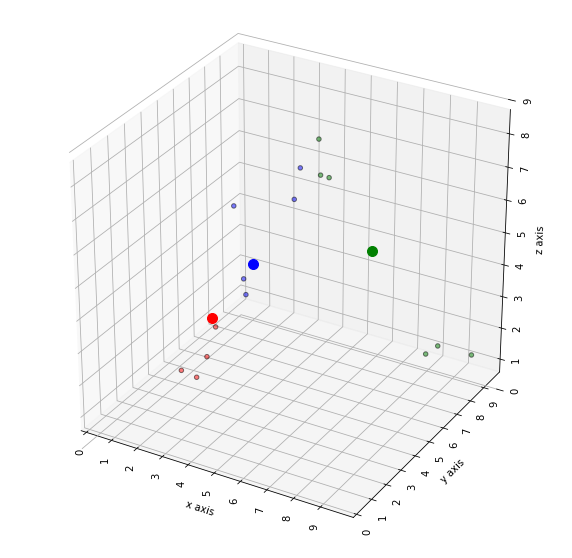

In [18]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(df['x'], df['y'], df['z'], color=df['color'], alpha=0.5, edgecolor='k')

ax.set_xticklabels(np.arange(100), rotation=90, fontsize=10 )
ax.set_xlabel('x axis')
ax.set_xticks(np.arange(0, 100, 10.0))

ax.set_yticklabels(np.arange(100), rotation=90, fontsize=10 )
ax.set_ylabel('y axis')
ax.set_yticks(np.arange(0, 100, 10.0))

ax.set_zticklabels(np.arange(100), rotation=90, fontsize=10 )
ax.set_zlabel('z axis')
ax.set_zticks(np.arange(0, 100, 10.0))

for i in centroids.keys():
    ax.scatter(*centroids[i], color=colmap[i], s=100)
ax.axis(xmin=0, xmax=100)
ax.axis(ymin=0, ymax=100)
ax.axis(zmin=0, zmax=100)

plt.show()

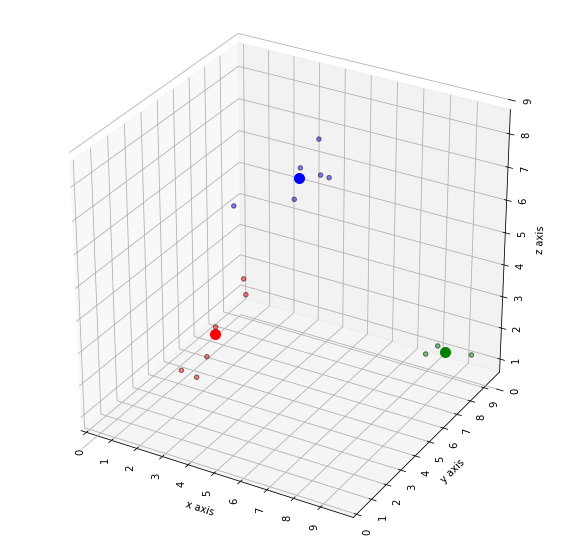

In [19]:
while True: 
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(df['x'], df['y'], df['z'], color=df['color'], alpha=0.5, edgecolor='k')

ax.set_xticklabels(np.arange(100), rotation=90, fontsize=10 )
ax.set_xlabel('x axis')
ax.set_xticks(np.arange(0, 100, 10.0))

ax.set_yticklabels(np.arange(100), rotation=90, fontsize=10 )
ax.set_ylabel('y axis')
ax.set_yticks(np.arange(0, 100, 10.0))

ax.set_zticklabels(np.arange(100), rotation=90, fontsize=10 )
ax.set_zlabel('z axis')
ax.set_zticks(np.arange(0, 100, 10.0))

for i in centroids.keys():
     ax.scatter(*centroids[i], color=colmap[i], s=100)

ax.axis(xmin=0, xmax=100)
ax.axis(ymin=0, ymax=100)
ax.axis(zmin=0, zmax=100)

plt.show()

In [20]:
centroids

{1: [23.333333333333332, 42.833333333333336, 23.666666666666668],
 2: [87.66666666666667, 88.33333333333333, 14.666666666666666],
 3: [44.833333333333336, 62.666666666666664, 69.16666666666667]}

In [21]:
unit_vector1=np.sqrt((centroids[1][0])**2+(centroids[1][1])**2+(centroids[1][2])**2)
unit_vector2=np.sqrt((centroids[2][0])**2+(centroids[2][1])**2+(centroids[2][2])**2)
unit_vector3=np.sqrt((centroids[3][0])**2+(centroids[3][1])**2+(centroids[3][2])**2)
print(unit_vector1, unit_vector2, unit_vector3)

54.21485036408382 125.31294160354442 103.54306672427019


In [22]:
centroids[1][0]

23.333333333333332